In [3]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the Dataset
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Model Selection
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [5]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Model Testing
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



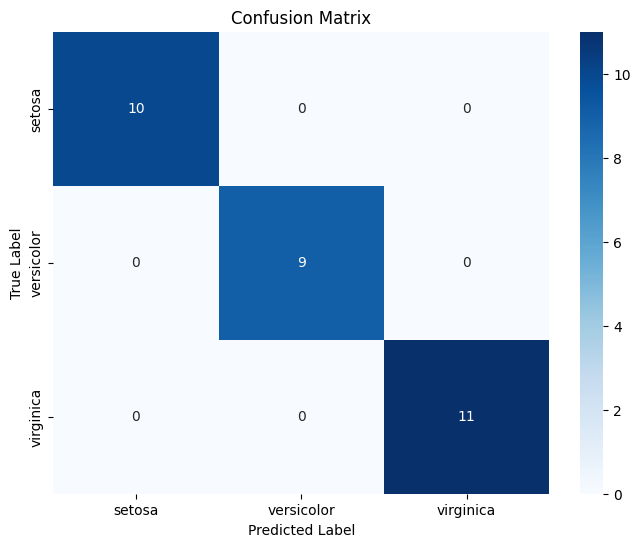

In [7]:
# Model Evaluation
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate probabilities for each class
y_probs = clf.predict_proba(X_test)

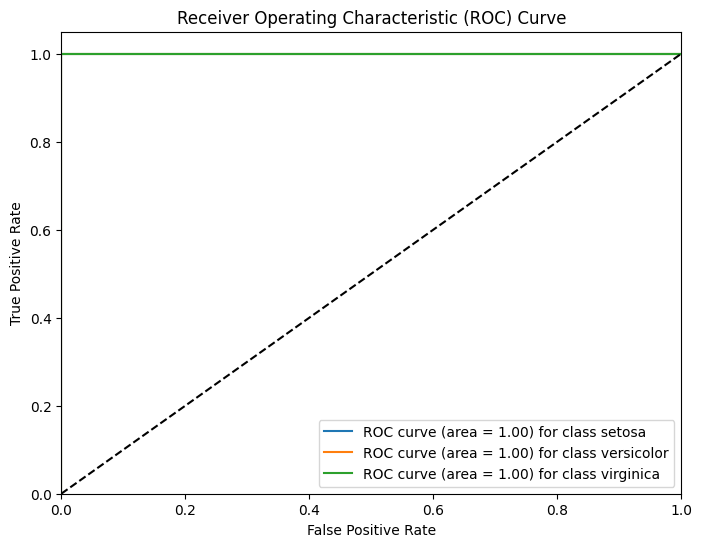

In [9]:

# ROC Curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(iris.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], iris.target_names[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [10]:
# Precision-Recall Curve
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(len(iris.target_names)):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_probs[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

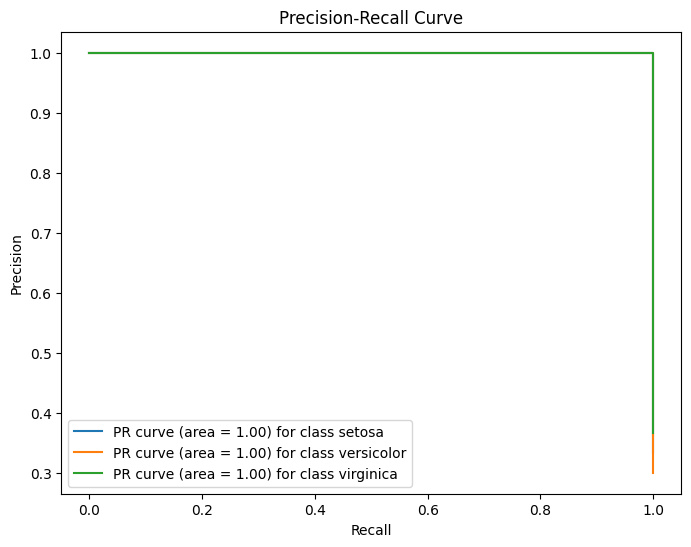

In [11]:
# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    plt.plot(recall[i], precision[i], label='PR curve (area = %0.2f) for class %s' % (pr_auc[i], iris.target_names[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()